# Project - Tim Thoma - NLTK

In [1]:
# import Trump Data
import pandas as pd
df_trump = pd.read_csv('@realDonaldTrump_tweets.csv')

In [2]:
# import Clinton Data
import pandas as pd
df_clinton = pd.read_csv('@HillaryClinton_tweets.csv')

In [3]:
# import Sanders Data
import pandas as pd
df_sanders = pd.read_csv('@BernieSanders_tweets.csv')

## NLTK

![Flowchart](NLTK/flowcharts_nltk.png)

## Basic Cleaning of Tweets

In [4]:
import re #Regular expression operations
import numpy as np

def df_cleaning(tweets):
    df_ = []

    pattern1 = re.compile("https?://[A-Za-z0-9./]+") # filter Websites
    pattern2 = re.compile("@[A-Za-z0-9]+") # filter @Names
    pattern3 = re.compile(r"[^a-zA-Z0-9 ]")# return only all alphabetic characters and spaces

    for item in tweets.Text:
        tweet = re.sub(pattern1, "", item) 
        tweet = re.sub(pattern2, "", tweet)
        tweet = re.sub(pattern3, "", tweet)
        df_.append(tweet)
    df_ = pd.DataFrame(df_, columns = ['tweet'])
    
    
    # convert to lower case and delete the first "b"
    df_ = pd.DataFrame(df_['tweet'].str.lower())
    df_ = df_['tweet'].str[1:]
    df_ = pd.DataFrame(df_, columns = ['tweet'])
    # drop empty rows
    df_['tweet'].replace('', np.nan, inplace = True)
    df_.dropna(subset = ['tweet'], inplace = True)
    df_.reset_index(drop=True)
    
    
    return df_
    
#df_cleaning(tweets = df_trump)



In [5]:
# apply basic cleaning on all datasets

df_t = df_cleaning(tweets = df_trump).reset_index(drop=True)
df_c = df_cleaning(tweets = df_clinton).reset_index(drop=True)
df_s = df_cleaning(tweets = df_sanders).reset_index(drop=True)

#### NLTK library / model

In [6]:
# download nltk library
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Tokenization

In [7]:
#tokenization
import nltk
from nltk.tokenize import word_tokenize

def identify_tokens(row):
    string = row['tweet']
    tokens = word_tokenize(string)
    # take only words and numbers - not punctuations
    token_words = [w for w in tokens if w.isalnum()]
    return token_words


# 
df_t['words'] = df_t.apply(identify_tokens, axis=1)
df_c['words'] = df_c.apply(identify_tokens, axis=1)
df_s['words'] = df_s.apply(identify_tokens, axis=1)

#### Lemmatization

In [8]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemm_list(row):
    my_list = row['words']
    lemm_list = [lemmatizer.lemmatize(word) for word in my_list]
    return lemm_list

df_t['lemm_words'] = df_t.apply(lemm_list, axis=1)
df_c['lemm_words'] = df_c.apply(lemm_list, axis=1)
df_s['lemm_words'] = df_s.apply(lemm_list, axis=1)

#### Stop word removal

In [9]:
# Removing stop words
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
newStopWords = ['rt', 'donxe2x80x99', 'txe2x80xa6', 'xe2x80xa6', 'amp',
                       'xe2x80x94', 'xe2x80x94hillary', 'itxe2x80x99s', 'wa', 'ha']
stop_words.extend(newStopWords) 

def remove_stops(row):
    my_list = row['lemm_words']
    good_words = [w for w in my_list if not w in stop_words]
    return (good_words)

df_t['no_stopwords'] = df_t.apply(remove_stops, axis=1)
df_c['no_stopwords'] = df_c.apply(remove_stops, axis=1)
df_s['no_stopwords'] = df_s.apply(remove_stops, axis=1)

In [10]:
# Put all words in a single string

def rejoin_words(row):
    my_list = row['no_stopwords']
    joined_words = ( " ".join(my_list))
    return joined_words

df_t['final_words'] = df_t.apply(rejoin_words, axis=1)
df_c['final_words'] = df_c.apply(rejoin_words, axis=1)
df_s['final_words'] = df_s.apply(rejoin_words, axis=1)

#### Take a look at the dataframe

In [11]:
df_s

,tweet,words,lemm_words,no_stopwords,final_words
0,demagogues in america and around the world are...,"[demagogues, in, america, and, around, the, wo...","[demagogue, in, america, and, around, the, wor...","[demagogue, america, around, world, exploiting...",demagogue america around world exploiting peop...
1,i applaud the who fought to achieve this posi...,"[i, applaud, the, who, fought, to, achieve, th...","[i, applaud, the, who, fought, to, achieve, th...","[applaud, fought, achieve, positive, step, nur...",applaud fought achieve positive step nurse des...
2,rt yes xe2xacx87xefxb8x8f,"[rt, yes, xe2xacx87xefxb8x8f]","[rt, yes, xe2xacx87xefxb8x8f]","[yes, xe2xacx87xefxb8x8f]",yes xe2xacx87xefxb8x8f
3,today we celebrate the rich culture and histor...,"[today, we, celebrate, the, rich, culture, and...","[today, we, celebrate, the, rich, culture, and...","[today, celebrate, rich, culture, history, pue...",today celebrate rich culture history puerto ri...
4,this is the wealthiest country in the world am...,"[this, is, the, wealthiest, country, in, the, ...","[this, is, the, wealthiest, country, in, the, ...","[wealthiest, country, world, american, need, c...",wealthiest country world american need confide...
5,a few years ago we were told a 15 minimum wage...,"[a, few, years, ago, we, were, told, a, 15, mi...","[a, few, year, ago, we, were, told, a, 15, min...","[year, ago, told, 15, minimum, wage, unrealist...",year ago told 15 minimum wage unrealisticnnthe...
6,were in dubuque iowa to say to donald trump we...,"[were, in, dubuque, iowa, to, say, to, donald,...","[were, in, dubuque, iowa, to, say, to, donald,...","[dubuque, iowa, say, donald, trump, let, divid...",dubuque iowa say donald trump let divide u sta...
7,some candidates believe the best way forward i...,"[some, candidates, believe, the, best, way, fo...","[some, candidate, believe, the, best, way, for...","[candidate, believe, best, way, forward, middl...",candidate believe best way forward middle grou...
8,rt marched alongside my 85 year old grandpa m...,"[rt, marched, alongside, my, 85, year, old, gr...","[rt, marched, alongside, my, 85, year, old, gr...","[marched, alongside, 85, year, old, grandpa, m...",marched alongside 85 year old grandpa mcdonald...
9,if amazon and disney can pay its workers at le...,"[if, amazon, and, disney, can, pay, its, worke...","[if, amazon, and, disney, can, pay, it, worker...","[amazon, disney, pay, worker, least, 15, hour]",amazon disney pay worker least 15 hour


## Visual Analysis

#### Plot the 50 most common words in Tweets

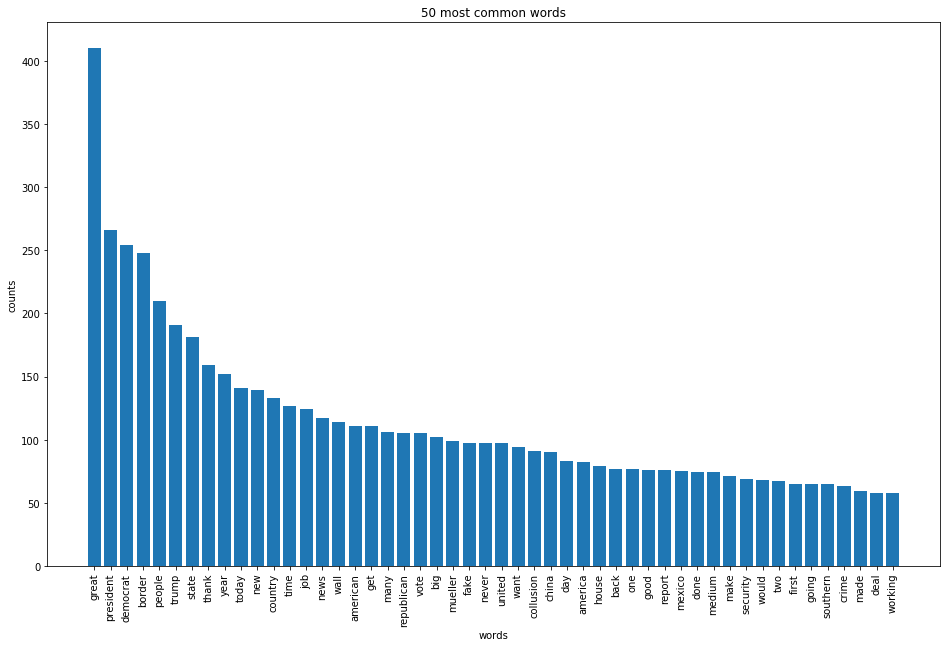

In [12]:
#### 50 most common words in the tweets ####
%matplotlib inline
# 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key = lambda x:x[1], reverse = True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize = (16, 10))
    plt.bar(x_pos, counts, align = 'center')
    plt.xticks(x_pos, words, rotation = 90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('50 most common words')
    plt.show()

# Initialise the count vectorizer 
count_vectorizer = CountVectorizer()


# Fit and transform the processed titles - uncomment the wanted visualization tweets
# trump
count_data = count_vectorizer.fit_transform(df_t.final_words)
# clinton
#count_data = count_vectorizer.fit_transform(df_c.final_words)
# sanders
#count_data = count_vectorizer.fit_transform(df_s.final_words)



# Visualise the 50 most common words
plot_50_most_common_words(count_data, count_vectorizer)


#### WordCloud of the 50 most common words in Tweets

There are 3106 tweets in the dataframe.


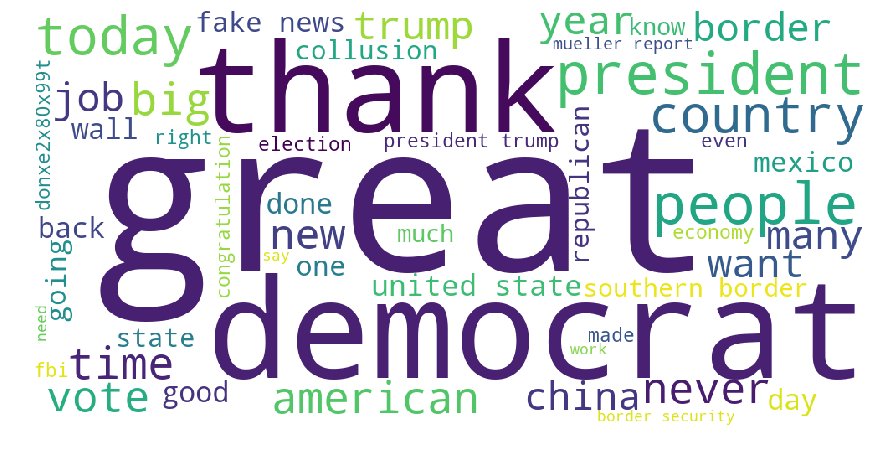

In [13]:
### wordcloud of 50 most common words in tweets ###

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

text = df_t.final_words
print("There are {} tweets in the dataframe.".format(len(text)))

## uncomment the wanted visualization
# Trump
my_list = df_t.final_words
# Clinton
#my_list = df_c.final_words
# Sanders
#my_list = df_s.final_words

unique_string = (" ").join(my_list)

# wordcloud
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white', max_words = 50, 
                      random_state = 42).generate(unique_string)

#wordcloud.to_file("wordcloud_.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


## Sentiment Analysis

- Polarity Classification: if the speaker expresses a positive or negative opinion

### TextBlob

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
#### Features
- Noun phrase extraction
- Part-of-speech tagging
- Sentiment analysis
- Classification (Naive Bayes, Decision Tree)
- Language translation and detection powered by Google Translate
- Tokenization (splitting text into words and sentences)
- Word and phrase frequencies
- Parsing
- n-grams
- Word inflection (pluralization and singularization) and lemmatization
- Spelling correction
- Add new models or languages through extensions
- WordNet integration

#### Advanced TextBlob

The textblob.sentiments module contains two sentiment analysis implementations, PatternAnalyzer (based on the pattern library) and NaiveBayesAnalyzer (an NLTK classifier trained on a movie reviews corpus).

The default implementation is PatternAnalyzer, but you can override the analyzer by passing another implementation into a TextBlob’s constructor.

Pattern library: https://www.clips.uantwerpen.be/pattern

In [14]:
from textblob import TextBlob

def textblob(data):
    # textblob function
    def sentiment(tweet):
        analysis = TextBlob(tweet)
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

    # new textblob column
    data['textblob_SA'] = np.array([ sentiment(tweet) for tweet in data['final_words'] ])
    # write positive, neutral, negative in column
    pos_tweets = [ tweet for index, tweet in enumerate(data['final_words']) if data['textblob_SA'][index] > 0]
    neut_tweets = [ tweet for index, tweet in enumerate(data['final_words']) if data['textblob_SA'][index] == 0]
    neg_tweets = [ tweet for index, tweet in enumerate(data['final_words']) if data['textblob_SA'][index] < 0]
    # print
    print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['final_words'])))
    print("Percentage of neutral tweets: {}%".format(len(neut_tweets)*100/len(data['final_words'])))
    print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['final_words'])))

In [15]:
textblob(data = df_t)

Percentage of positive tweets: 46.61944623309723%
Percentage of neutral tweets: 34.44945267224726%
Percentage de negative tweets: 18.931101094655507%


In [16]:
textblob(data = df_c)

Percentage of positive tweets: 44.58281444582814%
Percentage of neutral tweets: 43.64881693648817%
Percentage de negative tweets: 11.768368617683686%


In [17]:
textblob(data = df_s)

Percentage of positive tweets: 43.097538173885944%
Percentage of neutral tweets: 42.224992209411035%
Percentage de negative tweets: 14.677469616703023%


## Vader

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.
It is fully open-sourced under the MIT License. 

VADER has a lot of advantages over traditional methods of Sentiment Analysis, including:
- It works exceedingly well on social media type text, yet readily generalizes to multiple domains
- It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
- It is fast enough to be used online with streaming data, and
- It does not severely suffer from a speed-performance tradeoff.

Furthermore VADER can handle Emojis, Slangs, Emoticons

#### Advanced VADER
https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk

In [18]:
#Vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
def Vader(data):
    # Vader function
    def sentiment_analyzer_scores(text):
        score = sentiment.polarity_scores(text)
        lb = score['compound']
        if lb >= 0.05:
            return 1
        elif (lb > -0.05) and (lb < 0.05):
            return 0
        else:
            return -1

    # create new column
    data['vader_SA'] = np.array([ sentiment_analyzer_scores(tweet) for tweet in data['final_words'] ])
    # write positive, neutral, negative tweets
    pos_tweets = [ tweet for index, tweet in enumerate(data['final_words']) if data['vader_SA'][index] > 0]
    neu_tweets = [ tweet for index, tweet in enumerate(data['final_words']) if data['vader_SA'][index] == 0]
    neg_tweets = [ tweet for index, tweet in enumerate(data['final_words']) if data['vader_SA'][index] < 0]
    # print
    print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['final_words'])))
    print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['final_words'])))
    print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['final_words'])))

In [19]:
Vader(data = df_t)

Percentage of positive tweets: 52.02833226014166%
Percentage of neutral tweets: 20.86284610431423%
Percentage de negative tweets: 27.108821635544107%


In [20]:
Vader(data = df_c)

Percentage of positive tweets: 51.307596513075964%
Percentage of neutral tweets: 27.08592777085928%
Percentage de negative tweets: 21.606475716064757%


In [21]:
Vader(data = df_s)

Percentage of positive tweets: 49.98441882206295%
Percentage of neutral tweets: 22.405733873480834%
Percentage de negative tweets: 27.609847304456217%


In [22]:
df_t

,tweet,words,lemm_words,no_stopwords,final_words,textblob_SA,vader_SA
0,xe2x80x9cwhy did the democrats run if they did...,"[xe2x80x9cwhy, did, the, democrats, run, if, t...","[xe2x80x9cwhy, did, the, democrat, run, if, th...","[xe2x80x9cwhy, democrat, run, didnxe2x80x99t, ...",xe2x80x9cwhy democrat run didnxe2x80x99t want ...,0,1
1,good day in the stock market people have no id...,"[good, day, in, the, stock, market, people, ha...","[good, day, in, the, stock, market, people, ha...","[good, day, stock, market, people, idea, treme...",good day stock market people idea tremendous p...,1,1
2,if mexico produces which i think they will big...,"[if, mexico, produces, which, i, think, they, ...","[if, mexico, produce, which, i, think, they, w...","[mexico, produce, think, biggest, part, deal, ...",mexico produce think biggest part deal mexico ...,0,0
3,companies to come to the usa and to get compan...,"[companies, to, come, to, the, usa, and, to, g...","[company, to, come, to, the, usa, and, to, get...","[company, come, usa, get, company, left, u, la...",company come usa get company left u land come ...,0,0
4,maria dagan steve stuart v when you are the b...,"[maria, dagan, steve, stuart, v, when, you, ar...","[maria, dagan, steve, stuart, v, when, you, ar...","[maria, dagan, steve, stuart, v, big, xe2x80x9...",maria dagan steve stuart v big xe2x80x9cpiggy ...,0,0
5,this is because the euro and other currencies ...,"[this, is, because, the, euro, and, other, cur...","[this, is, because, the, euro, and, other, cur...","[euro, currency, devalued, dollar, putting, u,...",euro currency devalued dollar putting u big di...,0,0
6,the united states has very low inflation a bea...,"[the, united, states, has, very, low, inflatio...","[the, united, state, ha, very, low, inflation,...","[united, state, low, inflation, beautiful, thing]",united state low inflation beautiful thing,1,1
7,sad when you think about it but mexico right n...,"[sad, when, you, think, about, it, but, mexico...","[sad, when, you, think, about, it, but, mexico...","[sad, think, mexico, right, united, state, bor...",sad think mexico right united state border dem...,-1,-1
8,presidential harassment,"[presidential, harassment]","[presidential, harassment]","[presidential, harassment]",presidential harassment,0,-1
9,investigation in the senate they can talk to j...,"[investigation, in, the, senate, they, can, ta...","[investigation, in, the, senate, they, can, ta...","[investigation, senate, talk, john, dean, cow,...",investigation senate talk john dean cow come h...,-1,0


In [23]:
#df_c

In [24]:
#df_s